In [283]:
from matplotlib import pyplot as plt
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import random
from scipy.stats import ks_2samp
from utils import ( 
                    numerical_data_distribution_plot,
                    create_drift_metric_comparison_table_numerical,
                    create_bin_strategy_comparison_table_numerical,
                    create_comparison_with_evidently_table_numerical,
                    create_sample_size_comparison_table_numerical,
                    create_sample_size_bin_comparison_table_numerical,
             )
from yaml import safe_load
config = safe_load(open('config.yml','rb'))

In [284]:
observations = 100_000
distribution_selection = '3c'

In [285]:
print(f'Observations: {observations}')
print(f'Distribution Selection: {distribution_selection}')

if distribution_selection == '1a':
    description = 'Identlical Normal Distributions - No Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.random.normal(50, 15, observations) # identical with x

elif distribution_selection == '1b':
    description = 'Normal Distributions - Minimal Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.random.normal(51, 15, observations) # small drift 

elif distribution_selection == '1c':
    description = 'Normal Distributions - Small Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.random.normal(52, 15, observations) # small drift 

elif distribution_selection == '1d':
    description = 'Normal Distributions - Large Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.random.normal(60, 20, observations) # small drift 

elif distribution_selection == '1e':
    description = 'Normal Distributions - Very Large Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.random.normal(150, 15, observations) # small drift 

elif distribution_selection == '1f':
    description = 'Normal Distributions - Extreme Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.random.normal(1500, 15, observations) # small drift 

elif distribution_selection == '1g':
    description = 'Normal Distributions - No Drift - Different Scale'
    x = np.random.normal(50000, 1500, observations) # reference
    y = np.random.normal(50000, 1500, observations) # small drift 

elif distribution_selection == '2a':
    description = 'Normal Distributions with Outliers - Small Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.append(np.random.normal(50, 15, observations),np.random.normal(125,1,int(observations/100))) # same as reference with small amout of outliers

elif distribution_selection == '2b':
    description = 'Normal Distributions with Outliers - Some Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.append(np.random.normal(50, 15, observations),np.random.normal(125,1,int(observations/80))) # same as reference with a some of outliers

elif distribution_selection == '2c':
    description = 'Normal Distributions with Outliers - Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.append(np.random.normal(50, 15, observations),np.random.normal(125,1,int(observations/60))) # same as reference with some outliers

elif distribution_selection == '2d':
    description = 'Normal Distributions with Outliers - Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.append(np.random.normal(50, 15, observations),np.random.normal(125,1,int(observations/40))) # same as reference with some outliers

elif distribution_selection == '3a':
    description = 'Identical Uniform Distributions - No Drift'
    x = np.random.uniform(10,50, observations) # reference
    y = np.random.uniform(10,50, observations) # small drift 

elif distribution_selection == '3b':
    description = 'Uniform Distributions with small excess in the upper range - Small Drift'
    x = np.random.uniform(10,50, observations) # reference
    y = np.append(np.random.uniform(10,50, int(observations*0.95)),np.random.uniform(20,50, int(observations*0.05)))  # small drift 

elif distribution_selection == '3c':
    description = 'Uniform Distributions with small excess in the upper range - Some Drift'
    x = np.random.uniform(10,50, observations) # reference
    y = np.append(np.random.uniform(10,50, int(observations*0.7)),np.random.uniform(20,50, int(observations*0.3)))  # some drift 

elif distribution_selection == '4a':
    description = 'Single Value - No Drift'
    x = np.full(observations,10) # single value
    y = np.full(observations,10) # same single value

elif distribution_selection == '4b':
    description = 'Single Value with some outliers - Drift'
    x = np.full(observations,10) # single value
    y = np.append(np.full(observations,10), np.full(int(observations/50),10.01)) # same single value with some outliers

elif distribution_selection == '4c':
    description = 'Differnt Single Values - Drift'
    x = np.full(observations,10) # single value
    y = np.full(observations,10.01) # single value



Observations: 100000
Distribution Selection: 3c


In [286]:
Markdown('# <strong>{}</strong><br/>'.format(description))

# <strong>Uniform Distributions with small excess in the upper range - Some Drift</strong><br/>

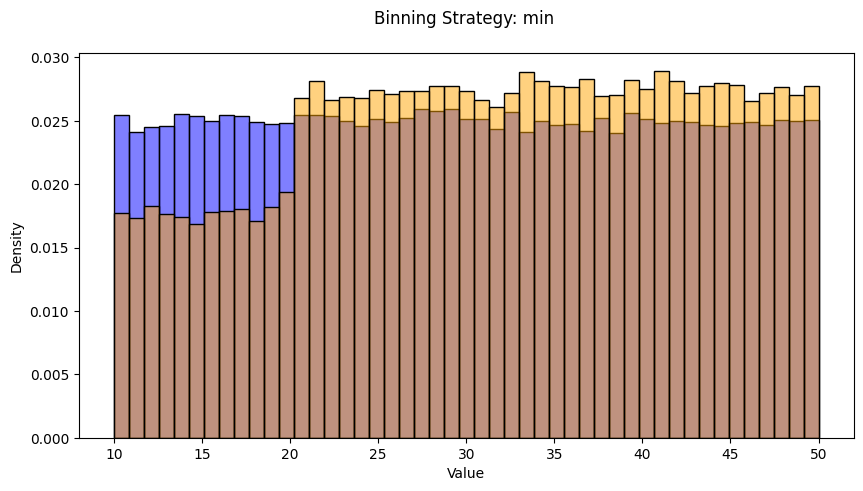

In [287]:
g = numerical_data_distribution_plot(x,y,bin_strategy='min')

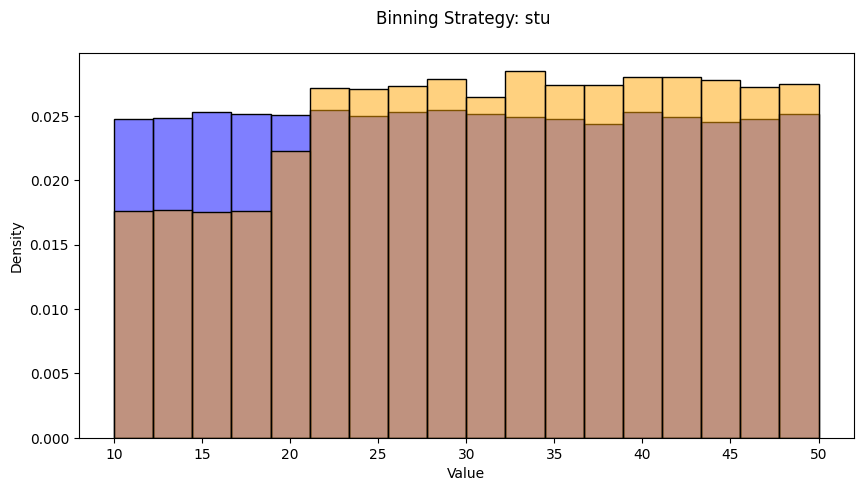

In [288]:
g = numerical_data_distribution_plot(x,y,bin_strategy='stu')

In [289]:
df = create_bin_strategy_comparison_table_numerical(x,y)
df

,stu,evi,min,max
Number of Bins,18.0000,19.0000,47.0000,51.0000
Jensen-Shannon Distance,0.0747,0.0754,0.0769,0.0773
Normed Wasserstein Distance,0.1349,0.1349,0.1349,0.1349
PSI,0.0310,0.0316,0.0329,0.0332
D_inf,0.0172,0.0160,0.0073,0.0068
KS Test,0.0000,0.0000,0.0000,0.0000


In [290]:
df = create_bin_strategy_comparison_table_numerical(x,y, output='drift_detection')
df

,stu,evi,min,max
Number of Bins,18,19,47,51
Jensen-Shannon Distance,no drift,no drift,no drift,no drift
Normed Wasserstein Distance,drift detected,drift detected,drift detected,drift detected
PSI,no drift,no drift,no drift,no drift
D_inf,no drift,no drift,no drift,no drift
KS Test,drift detected,drift detected,drift detected,drift detected


In [291]:
df = create_comparison_with_evidently_table_numerical(x,y)
df

,Local,Evidently
Jensen-Shannon Distance,0.0754,0.0627
Wasserstein Distance,0.1349,0.1349
PSI,0.0316,0.0316


In [292]:
df = create_sample_size_bin_comparison_table_numerical(x,y)
df

,stu,evi,min,max
Bins Full Sample,18,19,47,51
Bins 1/10th Sample,15,18,24,47
Bins 1/100th Sample,11,18,12,47
Bins 1/1000th Sample,8,18,8,47
"Bins 1/10,000th Sample",5,18,5,47


### Test Jensen-Shannon Distance

In [293]:
df = create_sample_size_comparison_table_numerical(x,y,"jensen_shannon_distance_numerical", output='distance')
df

,stu,evi,min,max
Full Sample,0.0747,0.0754,0.0769,0.0773
1/10th Sample,0.0800,0.0802,0.0829,0.0859
1/100th Sample,0.0824,0.0894,0.0847,0.1222
1/1000th Sample,0.1193,0.1543,0.1193,0.3689
"1/10,000th Sample",0.1384,0.5171,0.1384,0.7694


In [294]:
df = create_sample_size_comparison_table_numerical(x,y,"jensen_shannon_distance_numerical", output='drift_detection')
df

,stu,evi,min,max
Full Sample,no drift,no drift,no drift,no drift
1/10th Sample,no drift,no drift,no drift,no drift
1/100th Sample,no drift,drift detected,drift detected,drift detected
1/1000th Sample,drift detected,drift detected,drift detected,drift detected
"1/10,000th Sample",drift detected,drift detected,drift detected,drift detected


 ### Test Wasserstein Distance

In [295]:
df = create_sample_size_comparison_table_numerical(x,y,"normed_wasserstein_distance_numerical", output='distance')
df

,stu,evi,min,max
Full Sample,0.1349,0.1349,0.1349,0.1349
1/10th Sample,0.1313,0.1313,0.1313,0.1313
1/100th Sample,0.1837,0.1837,0.1837,0.1837
1/1000th Sample,0.1017,0.1017,0.1017,0.1017
"1/10,000th Sample",0.2936,0.2936,0.2936,0.2936


In [296]:
df = create_sample_size_comparison_table_numerical(x,y,"normed_wasserstein_distance_numerical", output='drift_detection')
df

,stu,evi,min,max
Full Sample,drift detected,drift detected,drift detected,drift detected
1/10th Sample,drift detected,drift detected,drift detected,drift detected
1/100th Sample,drift detected,drift detected,drift detected,drift detected
1/1000th Sample,drift detected,drift detected,drift detected,drift detected
"1/10,000th Sample",drift detected,drift detected,drift detected,drift detected


### Test PSI

In [297]:
df = create_sample_size_comparison_table_numerical(x,y,"psi_numerical", output='distance')
df

,stu,evi,min,max
Full Sample,0.0310,0.0316,0.0329,0.0332
1/10th Sample,0.0284,0.0283,0.0310,0.0351
1/100th Sample,0.0443,0.0449,0.0443,0.0793
1/1000th Sample,0.0855,0.1240,0.0855,0.3526
"1/10,000th Sample",0.4668,2.4436,0.4668,8.6653


In [298]:
df = create_sample_size_comparison_table_numerical(x,y,"psi_numerical", output='drift_detection')
df

,stu,evi,min,max
Full Sample,no drift,no drift,no drift,no drift
1/10th Sample,no drift,no drift,no drift,no drift
1/100th Sample,no drift,no drift,no drift,no drift
1/1000th Sample,no drift,no drift,no drift,drift detected
"1/10,000th Sample",drift detected,drift detected,drift detected,drift detected


### Test D_inf

In [299]:
df = create_sample_size_comparison_table_numerical(x,y,"d_inf_numerical", output='distance')
df

,stu,evi,min,max
Full Sample,0.0172,0.0160,0.0073,0.0068
1/10th Sample,0.0227,0.0199,0.0159,0.0095
1/100th Sample,0.0269,0.0190,0.0269,0.0140
1/1000th Sample,0.0453,0.0454,0.0453,0.0217
"1/10,000th Sample",0.1011,0.1450,0.1011,0.0791


In [300]:
df = create_sample_size_comparison_table_numerical(x,y,"d_inf_numerical", output='drift_detection')
df

,stu,evi,min,max
Full Sample,no drift,no drift,no drift,no drift
1/10th Sample,drift detected,no drift,no drift,no drift
1/100th Sample,drift detected,drift detected,drift detected,no drift
1/1000th Sample,drift detected,drift detected,drift detected,drift detected
"1/10,000th Sample",drift detected,drift detected,drift detected,drift detected


### Test KS Test

In [301]:
df = create_sample_size_comparison_table_numerical(x,y,"two_sample_ks_test_numerical", output='distance')
df

,stu,evi,min,max
Full Sample,0.0000,0.0000,0.0000,0.0000
1/10th Sample,0.0000,0.0000,0.0000,0.0000
1/100th Sample,0.0000,0.0000,0.0000,0.0000
1/1000th Sample,0.3246,0.3246,0.3246,0.3246
"1/10,000th Sample",0.6723,0.6723,0.6723,0.6723


In [302]:
df = create_sample_size_comparison_table_numerical(x,y,"two_sample_ks_test_numerical", output='drift_detection')
df

,stu,evi,min,max
Full Sample,drift detected,drift detected,drift detected,drift detected
1/10th Sample,drift detected,drift detected,drift detected,drift detected
1/100th Sample,drift detected,drift detected,drift detected,drift detected
1/1000th Sample,no drift,no drift,no drift,no drift
"1/10,000th Sample",no drift,no drift,no drift,no drift
